In [2]:
# Install required statistical packages
!pip install statsmodels -q
!pip install scikit-learn -q
!pip install pandas numpy matplotlib -q

print("✅ Packages installed successfully!")

✅ Packages installed successfully!


In [5]:
# Upload your airindex.csv file
from google.colab import files
import pandas as pd
import numpy as np

print("📤 STEP 1: Please upload your 'airindex.csv' file")
uploaded = files.upload()

# List uploaded files
print("\n📁 Uploaded files:")
for filename in uploaded.keys():
    print(f"  - {filename}")

📤 STEP 1: Please upload your 'airindex.csv' file


Saving airindex.csv to airindex (1).csv

📁 Uploaded files:
  - airindex (1).csv


In [6]:
# =====================================
# DATA CLEANING & PREPARATION
# =====================================
print("\n🧹 STEP 2: DATA CLEANING")
print("="*40)

# Load the dataset
try:
    df = pd.read_csv("airindex.csv")
    print(f"✅ Dataset loaded! Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nFirst 3 rows:")
    print(df.head(3))

    # 1. Remove duplicates
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    print(f"\nRemoved {initial_rows - df.shape[0]} duplicates")

    # 2. Remove missing values
    df.dropna(inplace=True)
    print(f"Rows after removing NA: {df.shape[0]}")

    # 3. Clean column names
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    print(f"\nCleaned column names: {list(df.columns)}")

    # 4. Keep only numeric columns
    numeric_df = df.select_dtypes(include=np.number)
    print(f"\nNumeric columns: {list(numeric_df.columns)}")
    print(f"Shape: {numeric_df.shape}")

    # Display data types
    print(f"\nData types:")
    print(numeric_df.dtypes)

except FileNotFoundError:
    print("❌ ERROR: 'airindex.csv' not found. Please upload it in the previous step.")
    print("Showing available files:")
    import os
    print(os.listdir('.'))


🧹 STEP 2: DATA CLEANING
✅ Dataset loaded! Shape: (3315, 11)
Columns: ['country', 'state', 'city', 'station', 'last_update', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg']

First 3 rows:
  country           state        city                                station  \
0   India  Andhra_Pradesh  Vijayawada             Kanuru, Vijayawada - APPCB   
1   India  Andhra_Pradesh  Vijayawada  Rajiv Gandhi Park, Vijayawada - APPCB   
2   India  Andhra_Pradesh  Vijayawada  Rajiv Gandhi Park, Vijayawada - APPCB   

        last_update   latitude  longitude pollutant_id  pollutant_min  \
0  09-01-2026 15:00  16.486692  80.699436        OZONE           23.0   
1  09-01-2026 15:00  16.509717  80.612222        PM2.5           68.0   
2  09-01-2026 15:00  16.509717  80.612222          NH3            3.0   

   pollutant_max  pollutant_avg  
0           35.0           23.0  
1          111.0           96.0  
2            5.0            4.0  

Removed 0 duplica

In [7]:
# =====================================
# PREPARE FEATURES AND TARGET
# =====================================
print("\n🎯 STEP 3: PREPARE FEATURES AND TARGET")
print("="*40)

# Check if we have numeric_df
if 'numeric_df' in locals() or 'numeric_df' in globals():
    # Try to find 'pollutant_avg' column
    if 'pollutant_avg' in numeric_df.columns:
        X = numeric_df.drop('pollutant_avg', axis=1)
        y = numeric_df['pollutant_avg']
        print(f"✅ Using 'pollutant_avg' as target")
    else:
        # Use last column as target
        X = numeric_df.iloc[:, :-1]
        y = numeric_df.iloc[:, -1]
        print(f"⚠ 'pollutant_avg' not found. Using last column '{y.name}' as target")

    print(f"\nFeatures shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"\nFeature names: {list(X.columns)}")
    print(f"Target name: {y.name}")

    # Show basic statistics
    print(f"\n📊 Target Statistics:")
    print(f"Mean: {y.mean():.2f}")
    print(f"Std: {y.std():.2f}")
    print(f"Min: {y.min():.2f}")
    print(f"Max: {y.max():.2f}")

    print(f"\n📊 Features Statistics (first 3):")
    for col in X.columns[:3]:
        print(f"{col:15s}: Mean = {X[col].mean():.2f}, Std = {X[col].std():.2f}")

else:
    print("❌ ERROR: Data not loaded properly. Please check previous steps.")


🎯 STEP 3: PREPARE FEATURES AND TARGET
✅ Using 'pollutant_avg' as target

Features shape: (3144, 4)
Target shape: (3144,)

Feature names: ['latitude', 'longitude', 'pollutant_min', 'pollutant_max']
Target name: pollutant_avg

📊 Target Statistics:
Mean: 58.26
Std: 70.32
Min: 1.00
Max: 415.00

📊 Features Statistics (first 3):
latitude       : Mean = 23.01, Std = 5.31
longitude      : Mean = 78.68, Std = 4.80
pollutant_min  : Mean = 33.32, Std = 45.96


In [8]:
# =====================================
# TRAIN-TEST SPLIT & MODEL TRAINING
# =====================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

print("\n🤖 STEP 4: MODEL TRAINING")
print("="*40)

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nScaling applied:")
print(f"  Mean of first feature after scaling: {X_train_scaled[:, 0].mean():.2f}")
print(f"  Std of first feature after scaling: {X_train_scaled[:, 0].std():.2f}")

# 3. Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Save model and scaler
joblib.dump(model, "aqi_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model trained and saved!")

# 5. Display model coefficients
print(f"\n📈 Model Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:15s}: {coef:.4f}")

# 6. Make predictions
y_pred = model.predict(X_test_scaled)
print("\n✅ Predictions generated!")


🤖 STEP 4: MODEL TRAINING
Training samples: 2515
Testing samples: 629

Scaling applied:
  Mean of first feature after scaling: 0.00
  Std of first feature after scaling: 1.00

✅ Model trained and saved!

📈 Model Coefficients:
Intercept: 58.0091
latitude       : 0.0666
longitude      : 0.1593
pollutant_min  : 33.9721
pollutant_max  : 39.3848

✅ Predictions generated!


In [9]:
# =====================================
# BASIC MODEL EVALUATION
# =====================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n📊 STEP 5: BASIC EVALUATION METRICS")
print("="*40)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"1️⃣ Mean Absolute Error (MAE): {mae:.2f}")
print(f"2️⃣ Mean Squared Error (MSE): {mse:.2f}")
print(f"3️⃣ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"4️⃣ R² Score: {r2:.4f}")

# Residuals
residuals = y_test.values - y_pred
print(f"\n📉 Residual Analysis:")
print(f"  Mean of residuals: {residuals.mean():.4f} (should be close to 0)")
print(f"  Std of residuals: {residuals.std():.4f}")
print(f"  Min residual: {residuals.min():.2f}")
print(f"  Max residual: {residuals.max():.2f}")

# Performance interpretation
print(f"\n💡 Performance Interpretation:")
if r2 > 0.9:
    print("  ✅ Excellent fit! Model explains most of the variance.")
elif r2 > 0.7:
    print("  👍 Good fit. Model explains significant variance.")
elif r2 > 0.5:
    print("  ⚠️ Moderate fit. Model explains some variance.")
else:
    print("  ❌ Poor fit. Consider feature engineering or different model.")


📊 STEP 5: BASIC EVALUATION METRICS
1️⃣ Mean Absolute Error (MAE): 7.89
2️⃣ Mean Squared Error (MSE): 291.19
3️⃣ Root Mean Squared Error (RMSE): 17.06
4️⃣ R² Score: 0.9376

📉 Residual Analysis:
  Mean of residuals: 1.2154 (should be close to 0)
  Std of residuals: 17.0209
  Min residual: -85.92
  Max residual: 179.57

💡 Performance Interpretation:
  ✅ Excellent fit! Model explains most of the variance.



📈 STEP 6: VISUALIZATIONS


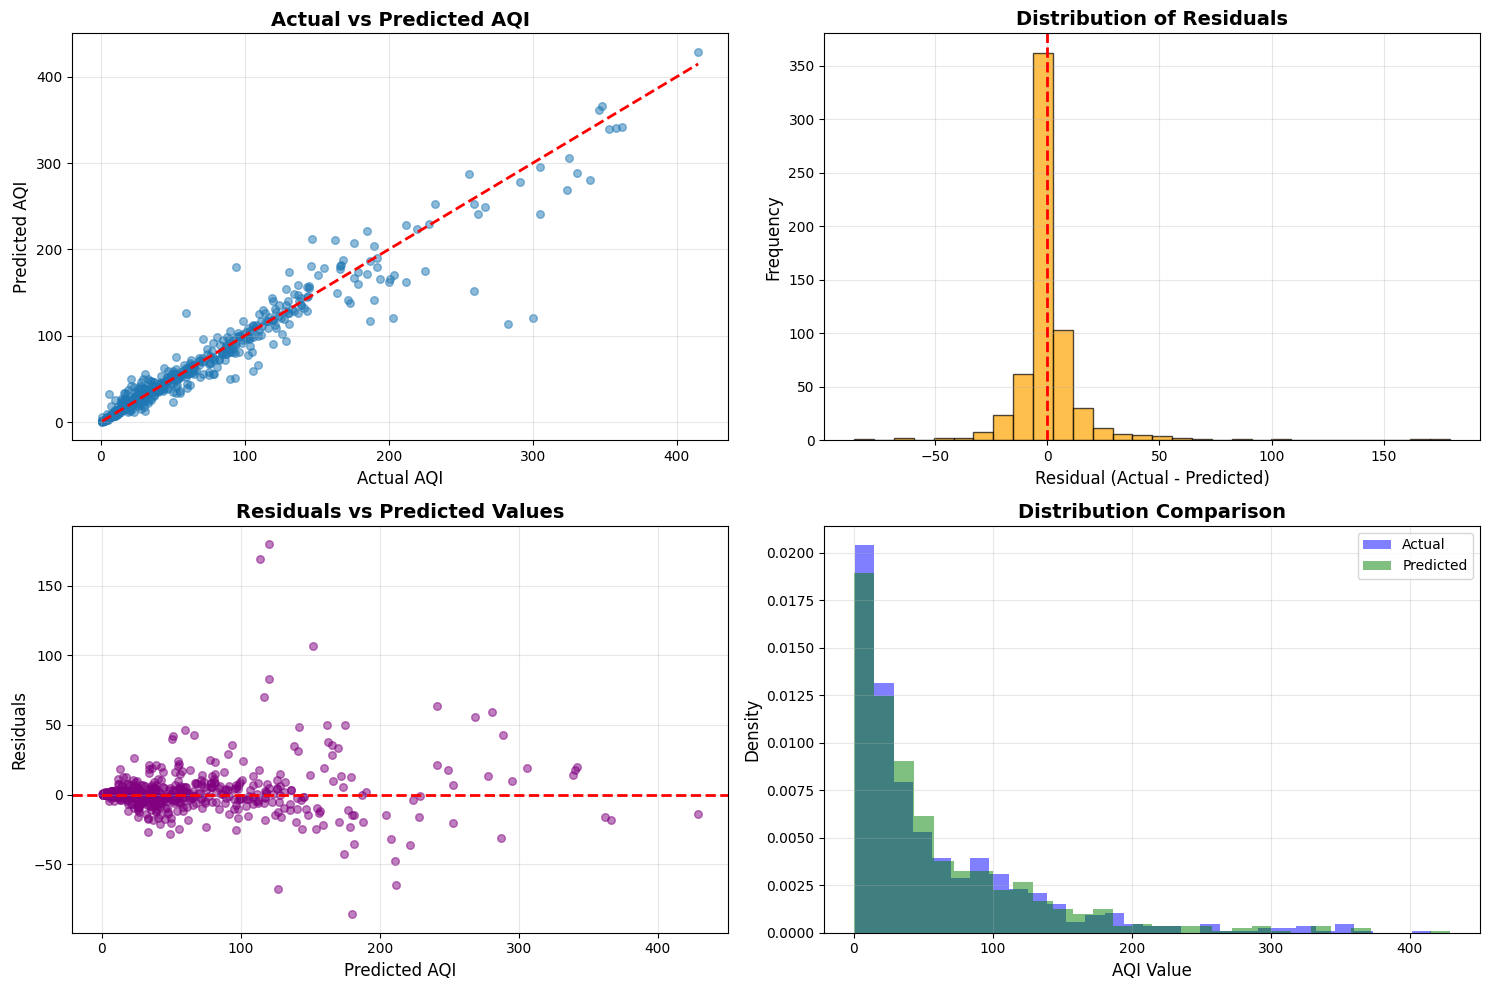

In [10]:
# =====================================
# VISUALIZATIONS
# =====================================
import matplotlib.pyplot as plt

print("\n📈 STEP 6: VISUALIZATIONS")
print("="*40)

plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted Scatter
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AQI', fontsize=12)
plt.ylabel('Predicted AQI', fontsize=12)
plt.title('Actual vs Predicted AQI', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals Histogram
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Residual (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

# Plot 3: Residuals vs Predicted
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals, alpha=0.5, color='purple', s=30)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted AQI', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 4: Actual vs Predicted Distribution
plt.subplot(2, 2, 4)
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='blue', density=True)
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted', color='green', density=True)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# =====================================
# STATISTICAL HYPOTHESIS TESTS
# =====================================
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import jarque_bera, shapiro

print("\n🧪 STEP 7: STATISTICAL HYPOTHESIS TESTS")
print("="*60)

# --------------------------------------------------
# TEST 1: Fit model with statsmodels for p-values
# --------------------------------------------------
print("\n1️⃣ REGRESSION SUMMARY WITH P-VALUES:")

# Add constant to X
X_train_with_const = sm.add_constant(X_train_scaled)
sm_model = sm.OLS(y_train, X_train_with_const).fit()

# Display summary
print(sm_model.summary())
print("-"*60)

# --------------------------------------------------
# TEST 2: Individual Coefficient T-Tests
# --------------------------------------------------
print("\n2️⃣ T-TESTS FOR EACH FEATURE:")
print("-"*40)
print(f"{'Feature':15s} {'Coefficient':12s} {'t-statistic':12s} {'p-value':12s} {'Significant':12s}")
print("-"*65)

for i, feature in enumerate(['Intercept'] + list(X.columns)):
    coef = sm_model.params[i]
    t_stat = sm_model.tvalues[i]
    p_value = sm_model.pvalues[i]
    sig = "✓ p<0.05" if p_value < 0.05 else "✗ Not sig"
    print(f"{feature:15s} {coef:12.4f} {t_stat:12.4f} {p_value:12.4f} {sig:12s}")

# --------------------------------------------------
# TEST 3: Overall Model F-Test
# --------------------------------------------------
print(f"\n3️⃣ OVERALL MODEL F-TEST:")
print(f"  F-statistic: {sm_model.fvalue:.4f}")
print(f"  p-value: {sm_model.f_pvalue:.10f}")
if sm_model.f_pvalue < 0.05:
    print(f"  ✅ Model is statistically significant (p < 0.05)")
else:
    print(f"  ❌ Model is NOT statistically significant")

# --------------------------------------------------
# TEST 4: Normality Tests
# --------------------------------------------------
print("\n4️⃣ NORMALITY TESTS FOR RESIDUALS:")

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals[:5000]) if len(residuals) > 5000 else shapiro(residuals)
print(f"  Shapiro-Wilk Test:")
print(f"    Statistic: {shapiro_stat:.4f}")
print(f"    p-value: {shapiro_p:.4f}")
print(f"    Normal: {'YES ✓' if shapiro_p > 0.05 else 'NO ✗'}")

# Jarque-Bera test
jb_stat, jb_p = jarque_bera(residuals)
print(f"\n  Jarque-Bera Test:")
print(f"    Statistic: {jb_stat:.4f}")
print(f"    p-value: {jb_p:.4f}")
print(f"    Normal: {'YES ✓' if jb_p > 0.05 else 'NO ✗'}")

# --------------------------------------------------
# TEST 5: Multicollinearity (VIF)
# --------------------------------------------------
print("\n5️⃣ MULTICOLLINEARITY TEST (VIF):")

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]
print(vif_data.to_string(index=False))

# Interpretation
print("\n  📋 VIF Interpretation:")
vif_values = vif_data["VIF"]
if all(vif < 5 for vif in vif_values):
    print("    ✅ No multicollinearity issues")
elif any(vif >= 10 for vif in vif_values):
    print("    ⚠ High multicollinearity detected!")
else:
    print("    ⚠ Moderate multicollinearity")

# --------------------------------------------------
# TEST 6: Autocorrelation (Durbin-Watson)
# --------------------------------------------------
print("\n6️⃣ AUTOCORRELATION TEST (Durbin-Watson):")

dw_stat = durbin_watson(residuals)
print(f"  Durbin-Watson statistic: {dw_stat:.4f}")

if 1.5 < dw_stat < 2.5:
    print("  ✅ No significant autocorrelation")
elif dw_stat <= 1.5:
    print("  ⚠ Positive autocorrelation detected")
else:
    print("  ⚠ Negative autocorrelation detected")

# --------------------------------------------------
# TEST 7: Z-Test for Mean Comparison
# --------------------------------------------------
print("\n7️⃣ Z-TEST (Actual vs Predicted Means):")

actual_mean = y_test.mean()
predicted_mean = y_pred.mean()
n = len(y_test)

# Calculate z-statistic
z_stat = (actual_mean - predicted_mean) / np.sqrt(
    (y_test.std()**2 + np.std(y_pred)**2) / n
)
z_p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"  Actual Mean: {actual_mean:.4f}")
print(f"  Predicted Mean: {predicted_mean:.4f}")
print(f"  Z-statistic: {z_stat:.4f}")
print(f"  p-value: {z_p_value:.4f}")
print(f"  Means different: {'YES ✓' if z_p_value < 0.05 else 'NO ✗'}")

print("\n" + "="*60)
print("✅ ALL STATISTICAL TESTS COMPLETED!")
print("="*60)


🧪 STEP 7: STATISTICAL HYPOTHESIS TESTS

1️⃣ REGRESSION SUMMARY WITH P-VALUES:
                            OLS Regression Results                            
Dep. Variable:          pollutant_avg   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.732e+04
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:28:21   Log-Likelihood:                -10065.
No. Observations:                2515   AIC:                         2.014e+04
Df Residuals:                    2510   BIC:                         2.017e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

/tmp/ipython-input-2745517736.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = sm_model.params[i]
/tmp/ipython-input-2745517736.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat = sm_model.tvalues[i]
/tmp/ipython-input-2745517736.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = sm_model.pvalues[i]
